https://30daymapchallenge.com/

# Setup

## Install & Import Libraries

In [ ]:
!pip install --quiet cmasher pygwalker osmnx plotly langchain psycopg2-binary sqlalchemy geoalchemy2  langchain_community census us

ERROR: Could not find a version that satisfies the requirement mycreds (from versions: none)
ERROR: No matching distribution found for mycreds


In [ ]:
#core DS libraries
import pandas as pd
import numpy as np
import geopandas as gpd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg #quick explatory data visualization
import plotly.express as px
import matplotlib.colors as mcolors


#APIs
import osmnx as ox #Open Street Map API

from census import Census
from us import states
import requests

#System Libraries
import os
import re
import warnings
import json
import re



#Database Libraries
import psycopg2
from sqlalchemy import create_engine

#RAG/LLM libraries
from langchain import PromptTemplate, SQLDatabase
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA


#Data Access
from google.colab import drive
from google.colab import auth


## Definitions

In [ ]:


c_key = "3ba7230b85a9584837a28f64fb48633131da6bbe"
c = Census(c_key)

In [ ]:
#Map Projection for California Zone 6
#https://epsg.io/26946
SD_crs = 'EPSG:26946'
# common_crs = SD_crs
common_crs = "EPSG:4326"

## Data Access

In [ ]:
#Paths

mount_path = '/content/drive/'
files_path = '/content/drive/MyDrive/DSE200_Data'

In [ ]:
#Mount the drive

drive.mount(mount_path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Roads Dataset


road_featnames_zip = 'tl_2018_06073_featnames.zip'
road_featnames_path = os.path.join(files_path, road_featnames_zip)
road_featnames = gpd.read_file(road_featnames_path)

roads_zip = 'tl_2018_06073_roads.zip'
roads_path = os.path.join(files_path, roads_zip)
roads = gpd.read_file(roads_path)




In [ ]:
#San Diego Communities/Neighborhoods Data Set

communities_csv = 'sd_community_boundaries.csv'
communities_path = os.path.join(files_path, communities_csv)
communities = gpd.read_file(communities_path)



communities_gdf = gpd.GeoDataFrame(
    geometry=gpd.GeoSeries.from_wkt(communities['geometry'], crs=common_crs), data=communities
)


In [ ]:
#Businesses Dataset
#Use the openstreetmaps API
#'key': True pulls all rows that have a value in that column
#Note these have a lot of columns

place = 'San Diego, California'
tags_amenity ={'amenity': True}
tags_shop = {'shop': True}

pois_amenity_gdf = ox.features_from_place(place, tags=tags_amenity)
pois_shop_gdf = ox.features_from_place(place, tags=tags_shop)




In [ ]:
#City Boundaries Dataset

boundaries_zip = 'City_and_County_Boundaries.zip'
boundaries_path = os.path.join(files_path, boundaries_zip)
boundaries = gpd.read_file(boundaries_path)




In [ ]:
ca_census = c.acs5.state_county_tract(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                                      state_fips = states.CA.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2020)

ca_census = pd.DataFrame(ca_census)

In [ ]:
ca_census.head()

,NAME,C17002_001E,C17002_002E,C17002_003E,B01003_001E,state,county,tract
0,"Census Tract 5035.02, Los Angeles County, Cali...",4324.0,171.0,286.0,4359.0,06,037,503502
1,"Census Tract 5041.02, Los Angeles County, Cali...",7.0,0.0,0.0,7.0,06,037,504102
2,"Census Tract 2657, Los Angeles County, California",5166.0,351.0,218.0,5181.0,06,037,265700
3,"Census Tract 2673, Los Angeles County, California",4656.0,552.0,342.0,4751.0,06,037,267300
4,"Census Tract 2675.02, Los Angeles County, Cali...",3524.0,82.0,347.0,3524.0,06,037,267502


# Maps


## Map 1

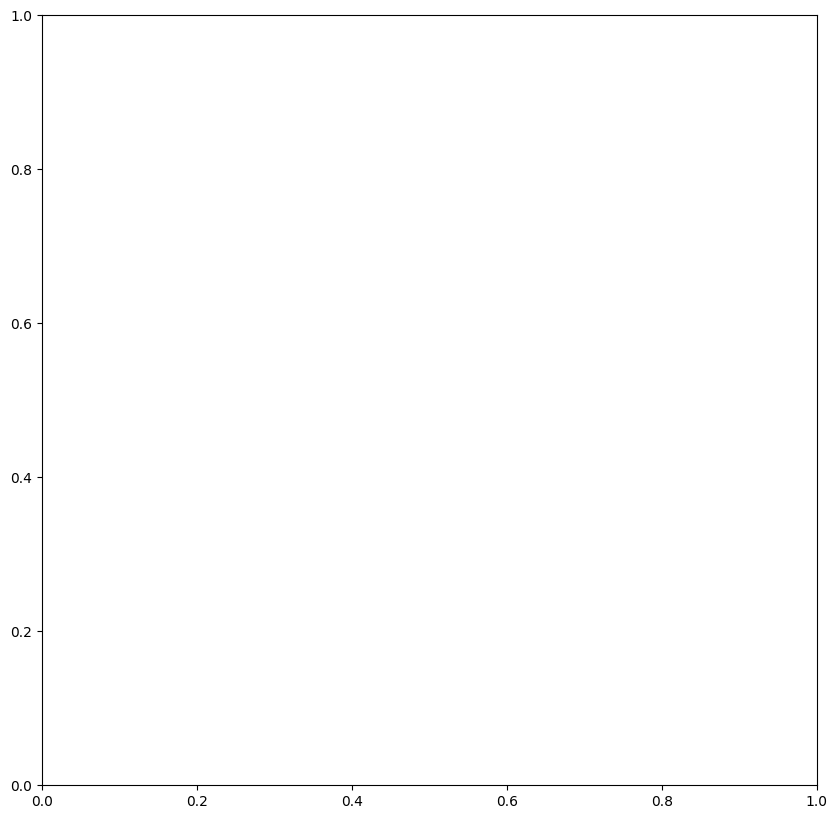

In [ ]:
fig1 , ax1 = plt.subplots(figsize=(10,10))


plt.show()